> __Content modified under Creative Commons Attribution license CC-BY
> 4.0, code under BSD 3-Clause License © 2020 R.C. Cooper__


# Roots of Nonlinear functions

## It's not always possible to analytically solve for a given variable. 

In the last [Module 03](./03_Get_Oscillations.ipynb), you created an _implicit_ Heun's method that created the following problem: How can you solve for a value of $y$, a dependent variable, when the function is a function of $y$, in an equation format it becomes

$y=f(y,parameters)$

where $parameters$ are known inputs to the equation, but the variable $y$ is not separable from the function $f$. You can rewrite the problem as 

$0=y-f(y,parameters).$

Many times, you may have a deeper problem such as wanting to know when two functions are equal to each other:

$0 = g(y,parameters) -f(y,parameters)$

where $g(y,parameters)$ in the previous equation was $g(y)=y$. 


## Getting to the root of a problem

This is a very common problem in engineering designs. You may have mathematical models for designs, but you can't explicitly solve for the variables you can control or see [1]. 


### Freefall example:
Consider an observation of an object, with a known shape, so its drag coefficient c=0.25 kg/m. If the object reaches a velocity of 36 m/s after 4 seconds of freefalling, what is its mass?

$v(t)=\sqrt{\frac{gm}{c_{d}}}\tanh(\sqrt{\frac{gc_{d}}{m}}t)$

We can plug in the known parameters, $t=4~s$, $v=36~m/s$, $c_d=0.25$ kg/s, and $g=9.81~m/s^2$, but you cannot separate $m$ from the $\tanh$ and $\sqrt{}$.

$36 = \sqrt{\frac{9.81m}{0.25}}\tanh(\sqrt{\frac{9.81*0.25}{m}}4)$

Instead, you can use computational methods to solve the problem by creating a new function f(m) where

$f(m)=36 - \sqrt{\frac{9.81m}{0.25}}\tanh(\sqrt{\frac{9.81*0.25}{m}}4)$. 

When f(m) = 0, you have solved for m in terms of the other variables (e.g. for a given time, velocity, drag coefficient and acceleration due to gravity)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams.update({'font.size': 22})
plt.rcParams['lines.linewidth'] = 3

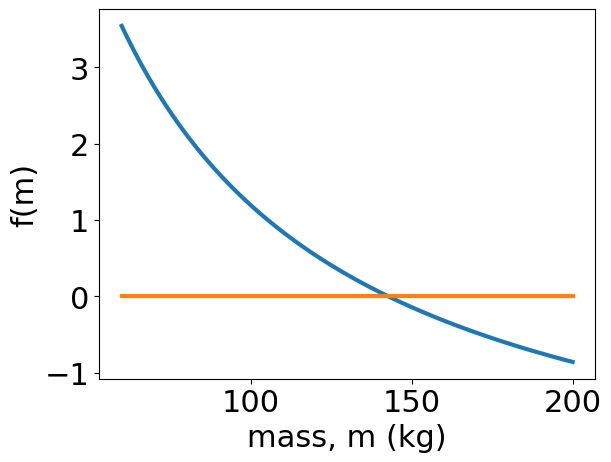

In [3]:
g=9.81 # acceleration due to gravity

def f_m(m,v=36,t=4,c_d=0.25,):
    ''' define a function f(m) that returns 
    v(t)-sqrt(mg/cd)*tanh(sqrt(gcd/m)*t)
    
    arguments:
    ---------
    m: mass of object
    c_d: drag coefficient default=0.25 kg/m  # drag coefficient
    t: time of velocity measure default=4 seconds
    v: velocity measure at time, t default=36 m/s
    
    returns:
    --------
    f_m: the difference between v(t) and sqrt(mg/cd)*tanh(sqrt(gcd/m)*t)
            if f_m ==0, then mass is correctly chosen
    '''
    
    f_m = v-np.sqrt(g*m/c_d)*np.tanh(np.sqrt(g*c_d/m)*t)
    return f_m

m=np.linspace(60, 200,100); # possible values for mass 50 to 200 kg
plt.plot(m,f_m(m))
plt.plot(m,np.zeros(len(m)))
plt.xlabel('mass, m (kg)')
plt.ylabel('f(m)');

In [4]:
f_m(149)

-0.12322824302261637

The Brute force method is plot f_m vs m and with smaller and smaller steps until f_m ~ 0, but you can do much better. 

We will look at two classes of methods, most numerical solutions use a combination of these two types of solvers:

1. Bracketing methods
2. Open methods

In __Bracketing__ methods, you choose an upper and lower bound and find the best solution in that range.

In __Open__ methods, you choose an initial guess, then you have a function that brings us closer to the solution with every iteration.

## Incremental searching ( a smarter brute force approach)

If you consider a range of possible masses, e.g. 50 kg - 200 kg, then you can evaluate your function $f(m)$ at evenly-spaced intervals and look for x-axis crossings. If the value of $f(m_{i})$ is positive, and the value of $f(m_{i+1})$ is negative, then the correct mass is somewhere between $m_i$ and $m_{i+1}$. 

Take a look at the implementation you have below of the `incsearch` function. 

There are a few key lines to look at:

```python
    x = np.linspace(xmin,xmax,ns)
    f = func(x)
```

In these two lines, you are dividing the interval into `ns`-equally-spaced values (our default is ns=50). Then, you evaluate your function ($f(m)$) `ns` times for each value. 

```python
    sign_f = np.sign(f)
    delta_sign_f = sign_f[1:]-sign_f[0:-1]
    i_zeros = np.nonzero(delta_sign_f!=0)
```

On these three lines, you are looking for sign-changes in the array `f`. First, you get just the sign of each array value with `np.sign`. Then, you look at the changes in sign with the difference between f[i] and f[i-1] for i=1...len(f). Finally, you get the indices sign changes by looking for nonzero elements in `delta_sign_f`.

## Discussion

Why can't you just consider cases where `delta_sign_f>0`? Why do you care about all nonzero sign changes?

In [5]:
def incsearch(func,xmin,xmax,ns=50):
    '''incsearch: incremental search root locator
    xb = incsearch(func,xmin,xmax,ns):
      finds brackets of x that contain sign changes
      of a function on an interval
    arguments:
    ---------
    func = name of function
    xmin, xmax = endpoints of interval
    ns = number of subintervals (default = 50)
    returns:
    ---------
    xb(k,1) is the lower bound of the kth sign change
    xb(k,2) is the upper bound of the kth sign change
    If no brackets found, xb = [].'''
    x = np.linspace(xmin,xmax,ns)
    f = func(x)
    sign_f = np.sign(f)
    delta_sign_f = sign_f[1:]-sign_f[0:-1]
    i_zeros = np.nonzero(delta_sign_f!=0)
    nb = len(i_zeros[0])
    xb = np.block([[ x[i_zeros[0]+1]],[x[i_zeros[0]] ]] )

    
    if nb==0:
      print('no brackets found\n')
      print('check interval or increase ns\n')
    else:
      print('number of brackets:  {}\n'.format(nb))
    return xb

## Test your function

To test your `incsearch` function on a known function, let's try finding all the times that $sin(x)$ crosses the x-axis from $x=-1...7$. Our function should return values at $x=0,~x=\pi/2,~x=\pi.$

number of brackets:  3



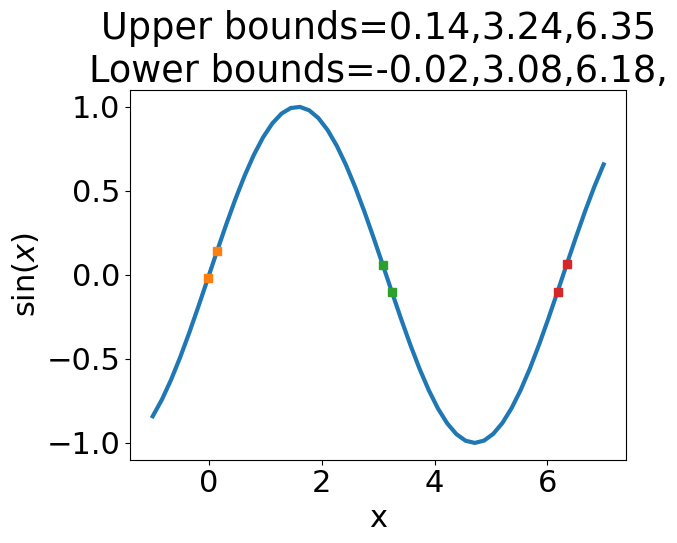

In [6]:
mn=-1
mx=7
x=np.linspace(mn,mx)
plt.plot(x,np.sin(x))

xb = incsearch(lambda x: np.sin(x),mn,mx,ns=50)

plt.plot(xb,np.sin(xb),'s')
plt.ylabel('$\sin(x)$')
plt.xlabel('x')
plt.title('Upper bounds={:.2f},{:.2f},{:.2f}\nLower bounds={:.2f},{:.2f},{:.2f},'.format(*xb[0,:],*xb[1,:]));

## Success - incsearch works

You should see that `incsearch` returns intervals in the correct locations near x=0, x=$\pi/2$ and x=$\pi.$ Now, let's apply it to the freefall problem and discover what mass is necessary to reach 36 m/s at t=4 sec of freefall.

Depending upon what `ns` you choose, you should see that a mass of 142-143 kg will reach 36 m/s in 4 seconds of freefall.

In [7]:
xb = incsearch(f_m,50,200,ns=100)

print('Upper bound on mass = {:.2f} kg'.format(*xb[0,:]))
print('Lower bound on mass = {:.2f} kg'.format(*xb[1,:]))

number of brackets:  1

Upper bound on mass = 143.94 kg
Lower bound on mass = 142.42 kg


## Exercise 

Use the `incsearch` function to find the number of times $cos(x)=0$ in the interval $x=0...8$.

Plot x-vs-cos(x)

and 

plot the values of `xb` and `np.cos(xb)` as $\circ$-markers (`'o'`)

## Bisection method

The `incsearch` function will always return a set of upper and lower bounds on the zeros of a function, but if you want to increase the accuracy of your solutions, you have to calculate $f(x)$ __a lot__. The error in the solution is always 

$error = \frac{x_{max}-x_{min}}{ns}$

We can reduce the number of times you have to evaluate the function with more insight. 

Let's divide interval in half until, then evaluate $f(x_{max})$, $f(x_{min})$,  and $\frac{x_{max}+x_{min}}{2}$. Now, you can look for a sign change between these three locations. You focus your attention on the bisected bracket. Look at the figure below that illustrates choosing the region of interest on the right vs left side of the interval.

![Using the bisection method to reduce search to half of interval](../images/bisection.png)

Let's use the same interval you started with to illustrate a few steps in the right direction. 

$x_{max}=200$ kg

$x_{min}=50$ kg

$x_{mid}=125$ kg

In [8]:
x=np.array([50,125,200])
fx=f_m(x)

print('f(xmin) = {:.2f}, f(xmid) = {:.2f}, f(xmax)={:.2f}'.format(*fx))

f(xmin) = 4.58, f(xmid) = 0.41, f(xmax)=-0.86


Now, you have reduced your region of interest to just 125-200 kg. 

## Exercise

Divide the region 125-200 kg into two, and repeat the above step. Is the solution in the upper (163-200 kg)? or lower (125-163 kg) region? What are the values of f_m(m)?

## Bisect Function

We can automate this process with a `bisect` function. Its a much better root locator because you can reduce the error without evaluating the function a lot of times [1, 2]. 

_Note the use of the function `break`:_

We can use an `if`-statement to check a condition and `break` the loop if that condition is met. These break statements are often used in `while`-loops so that you can have some stopping criteria. In your case, you use the specified error, `es`, as a stopping criteria. If your relative error, 

$e_{relative} = \frac{|x_{new}-x_{old}|}{x_{new}}$

is less than your specified error, the loop is broken and the number of iterations halts at that point. 

## Discussion

What is another stopping criteria that you could use?

In [9]:
def bisect(func,xl,xu,es=0.0001,maxit=50):
    '''bisect: root location zeroes
    root,fx,ea,iter=bisect(func,xl,xu,es,maxit,p1,p2,...):
    uses bisection method to find the root of func
    arguments:
    ------
    func = name of function
    xl, xu = lower and upper guesses
    es = desired relative error (default = 0.0001 )
    maxit = maximum allowable iterations (default = 50)
    p1,p2,... = additional parameters used by func
    returns:
    -------
    root = real root
    and a list of [fx, ea, iter]
    fx = function value at root
    ea = approximate relative error ( )
    iter = number of iterations'''
    xr = xl
    ea = 100
    for iter in range(0,maxit):
        xrold = xr
        xr = (xl + xu)/2
        if xr != 0:
            ea = abs((xr - xrold)/xr) * 100
        else:
            ea = abs((xr - xrold)/1) * 100
        test = func(xl)*func(xr)
        if test < 0:
            xu = xr;
        elif test > 0:
            xl = xr;
        else:
            ea = 0;
        if ea <= es:
            break

    root = xr
    fx = func(xr);
    return root,[fx,ea,iter]
    

In [10]:
Mass_at_36ms,out=bisect(f_m,50,200)
print('The best estimate for the mass is {} kg'.format(Mass_at_36ms))
print('We reached a relative error of {} with {} iterations'.format(out[1],out[2]))

The best estimate for the mass is 142.73769855499268 kg
We reached a relative error of 5.0109798921069224e-05 with 20 iterations


## Recursive functions

The `bisection` function and the next two open root solvers (`newtraph` and `modsecant`) make use of a recursive function. 

Definition:

__recursive: for a definition of recursive, see recursive.__

Recursive functions work by updating an initial assignment each time the function is called. In the bisection method, the initial solution is assumed to be halfway between the upper and lower bound

$x_{r} = \frac{x_u+x_l}{2},$

but once the upper or lower bound is updated, the value of $x_r$ is updated as well. This is why the first step in the loop is to temporarily save $x_r$ as `xrold`. With the `xrold` variable, you can track the progress of your solution. 

## Newton-Raphson: Open method

Bracketing methods are great, but they are burdened by slow convergence rates. In the bisection method, you reduce your error by 50\% with each region of interest selection, but this is rather slow. 

One of the fastest root-finding methods is the __Newton-Raphson__ method, it is an __open method__ so it does not require an upper- and lower-bound [1,2]. 

The __Newton-Raphson__ works by creating a Taylor series expansion around your initial guess of the function, 

$f(x_{0}+\Delta x) = f(x_{0}) +\frac{df}{dx}\Delta x +...$

We want to determine what step, $\Delta x$,  to take in order for $f(x_{0}+\Delta x)=0$. So you set your right hand side to 0 and ignore the $...$ -higher order terms. 

$0 = f(x_{0}) +\frac{df}{dx}\Delta x$

So your best guess for a solution is then

$x_{solution} = x_{0}+ \Delta x$

where 

$\Delta x = -f(x) \left({\frac{df}{dx}}\right)^{-1}.$

## Newton-Raphson example

Let's use the __Newton-Raphson__ method to solve an engineering problem. Consider a spherical tank of water that can be filled to a height, $h$, and has radius, $R$. 

The volume of water, $V$, in the tank is 

$V= \pi h^2\frac{3R-h}{3}.$

If your tank has a radius of $R=2~m$ and you need a volume of 29 $m^3$, what height should you fill it to?

To answer this question with the Newton-Raphson method, you first define a new function, $f(h,parameters)$

$f(h,parameters) = V-\pi h^2\frac{3R-h}{3}.$

Now you can plug in your known parameters

$f(h) = 29-\pi h^2\frac{6-h}{3},$

and calculate the derivative,  

$\frac{d}{dh}(f(h)) = -\pi \frac{12h-3h^2}{3}$

In [11]:
def f_h(h,V=29,R=2):
    return V-np.pi*h**2*(3*R-h)/3

def dfdh(h,V=29,R=2):
    return -np.pi*(6*R*h-3*h**2)/3

We can use the definitions of `f_h` and `dfdh` to calculate the height, $h$ to fill the tank.

In [12]:
xguess = 2
deltax = -f_h(xguess)/dfdh(xguess)
print(xguess+deltax)

2.974413341499149


## Discussion

Try changing the value of `xguess`. Is there any way to choose the best `xguess` value? Are there any `xguess` values that return an Python error? Why?

## Create a Newton-Raphson function

In the same way that you created bracketing method functions, you can create the Newton-Raphson method function to update your `xguess` until a desired tolerance is achieved.

In [13]:
def newtraph(func,dfunc,x0,es=0.0001,maxit=50):
    '''newtraph: Newton-Raphson root location zeroes
    root,[ea,iter]=newtraph(func,dfunc,x0,es,maxit,p1,p2,...):
    uses Newton-Raphson method to find the root of func
    arguments:
    ----------
    func = name of function
    dfunc = name of derivative of function
    x0 = initial guess
    es = desired relative error (default = 0.0001 )
    maxit = maximum allowable iterations (default = 50)
    returns:
    ----------
    root = real root
    ea = approximate relative error (%)
    iter = number of iterations'''
    xr = x0
    ea=1
    for iter in range(1,maxit):
        xrold = xr
        dx = -func(xr)/dfunc(xr)
        xr = xrold+dx
        if xr!=0:
            ea= np.abs((xr-xrold)/xr)*100 # relative error in %
        if ea < es:
            break
    return xr,[func(xr),ea,iter]
      

In [14]:
hr, out = newtraph(f_h,dfdh,1)
print(hr)

3.0791382579723865


## Compare techniques

Let's compare the relative error in finding the height, $h$, in the previous example as a function of the number of iterations in the bisection (`bisect`) method and the Newton-Raphson (`newtraph`). 

What you should see is that as you increase the number of iterations, the relative error decreases. You can compare the rate that the error decreases, $\frac{\Delta error}{\# iterations},$ for your two root locators.

We are going to set the maximum iterations, `maxit=n[i]`, to the desired value in the loop, but you want as low of an error as possible. You set your specified error to `es=0`.

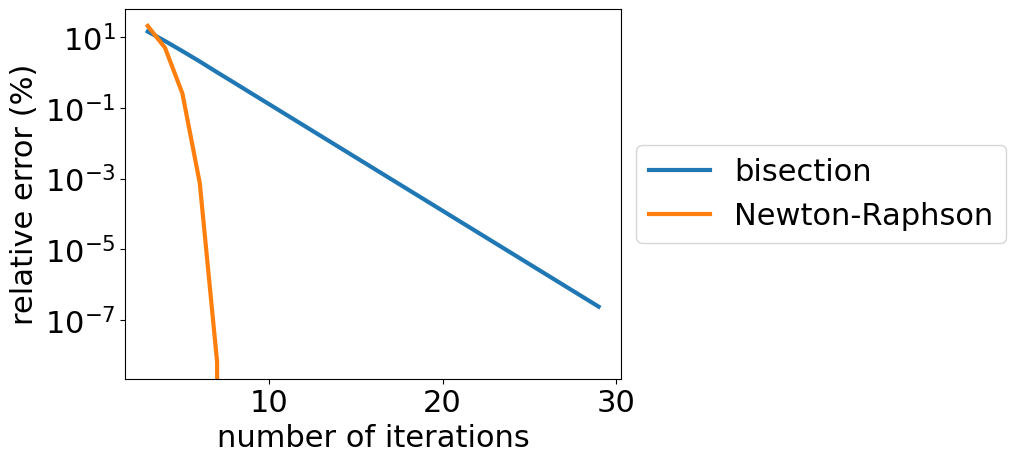

In [15]:
n=np.arange(3,30)

err_bisect = np.zeros(len(n))
err_newtraph=np.zeros(len(n))

for i in range(0,len(n)):
    root,out = bisect(f_h,0,4,es=0,maxit=n[i])
    err_bisect[i] = out[1]
    
    root,out = newtraph(f_h,dfdh,1,es=0,maxit=n[i])
    
    err_newtraph[i] =out[1]

plt.semilogy(n,err_bisect,label = 'bisection')
plt.semilogy(n,err_newtraph, label = 'Newton-Raphson')
plt.xlabel('number of iterations')
plt.ylabel('relative error (%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

## Discussion

There is a drastic difference between the `bisection` function and the `newtraph` function. How many iterations are necessary for the bisection method to reach an error of $10^{-3}$ \%? How many iterations are necessary for the Newton-Raphson method to reach an error of $10^{-3}$ \%? 

Are there any benefits to the bisection method? When would the Newton-Raphson method not work? or not be appropriate?

## Secant Methods

The key to the Newton-Raphson method is its evaluation of the derivative of the function, but you can't always evaluate the derivative. Many numerical functions, such as the solution to differential equations that you worked on in notebooks [01](./01_Catch_Motion.ipynb), [02](./02_Step_Future.ipynb), and [03](03_Get_Oscillations.ipynb) do not have analytical derivatives. Instead, you will approximate the derivative with a modified secant method.

Approximation of derivative:

$f'(x) \approx \frac{f(x+\delta x)-f(x)}{\delta x}$

## Modified Secant method

Change the x evaluations to a perturbation $\delta$ [1,2]. 

$x_{i+1}=x_{i}-\frac{f(x_{i})(\delta x_{i})}{f(x_{i}+\delta x_{i})-f(x_{i})}$

In [16]:
def mod_secant(func,dx,x0,es=0.0001,maxit=50):
    '''mod_secant: Modified secant root location zeroes
    root,[fx,ea,iter]=mod_secant(func,dfunc,xr,es,maxit,p1,p2,...):
    uses modified secant method to find the root of func
    arguments:
    ----------
    func = name of function
    dx = perturbation fraction
    xr = initial guess
    es = desired relative error (default = 0.0001 )
    maxit = maximum allowable iterations (default = 50)
    p1,p2,... = additional parameters used by function
    returns:
    --------
    root = real root
    fx = func evaluated at root
    ea = approximate relative error ( )
    iter = number of iterations'''

    iter = 0;
    xr=x0
    for iter in range(0,maxit):
        xrold = xr;
        dfunc=(func(xr+dx)-func(xr))/dx;
        xr = xr - func(xr)/dfunc;
        if xr != 0:
            ea = abs((xr - xrold)/xr) * 100;
        else:
            ea = abs((xr - xrold)/1) * 100;
        if ea <= es:
            break
    return xr,[func(xr),ea,iter]


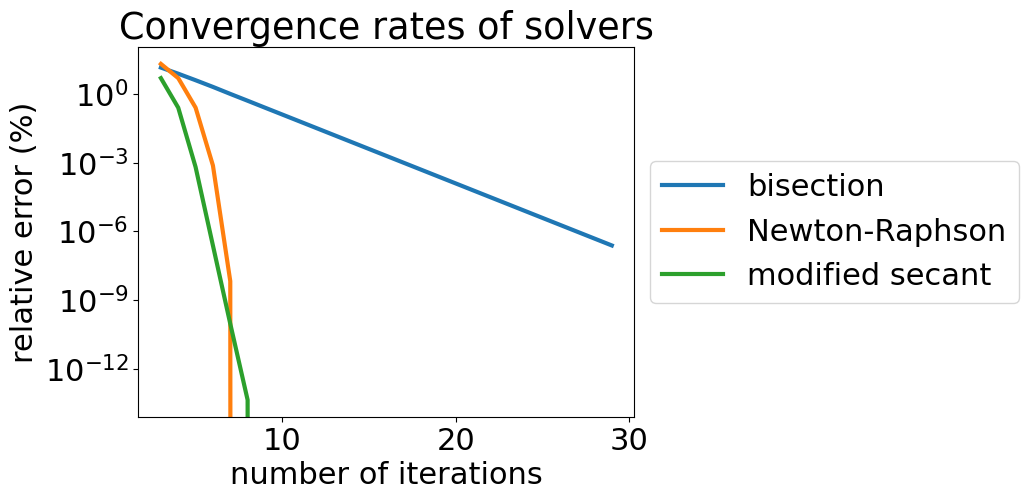

In [17]:
n=np.arange(3,30)

err_bisect = np.zeros(len(n))
err_newtraph=np.zeros(len(n))
err_modsec=np.zeros(len(n))

for i in range(0,len(n)):
    root,out = bisect(f_h,0,4,es=0,maxit=n[i])
    err_bisect[i] = out[1]
    
    root,out = newtraph(f_h,dfdh,1,es=0,maxit=n[i])
    err_newtraph[i] =out[1]
    
    root,out = mod_secant(f_h,0.001,1,es=0,maxit=n[i])
    err_modsec[i] =out[1]

plt.semilogy(n,err_bisect,label = 'bisection')
plt.semilogy(n,err_newtraph, label = 'Newton-Raphson')
plt.semilogy(n,err_modsec, label = 'modified secant')
plt.title('Convergence rates of solvers')
plt.xlabel('number of iterations')
plt.ylabel('relative error (%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

The modified secant can converge as quick as the Newton-Raphson method, but there is no universal $\delta x$ that works well for every problem. Typically, it is set as a small number and then varied based upon the conergence rate for the problem. 

## Shooting method

Now, you have multiple solving methods to revisit your __Initial Value Problems__. In notebooks [01](./01_Catch_Motion.ipynb) and [02](02_Step_Future.ipynb) you measured the displacement of a ball as a function of time. You _assumed_ the initial velocity was 0 in the case of the dropped object, or you approximated the velocity based upon the first two measured displacements and a finite difference approximation. 

Consider the case of the tennis ball that was dropped in the ['data/fallingtennisball02.txt file'](../data/fallingtennisball02.txt). After it strikes the ground, you don't really _know_ the velocity. What you _do know_ is that the position was $\approx 0$ at t=0.58 s and it was $\approx 0$ m at t=1.43 s. Solving your differential equation without an initial velocity is known as a "shooting" method.

![The shooting method imagined as a catapult aiming at a target](../images/shooting.png)

Solving this type of problem where the __boundaries__ are known is referred to as a _Boundary value problem_. Typically, boudary value problems happen over a distance, rather than points in time, but you will come back to those in the fifth module on boundary value problems. 

For now, let's reframe your engineering problem into a root-finding problem. You have a length of time of interest:

t=0.58 - 1.43 sec

in this time, the ball had just struck the ground and is traveling upwards. What is the initial velocity necessary to keep it in the air for $\Delta t = 0.85~s$ ?

We know that the ball is acted upon by gravity and the force of drag, but you do not an analytical solution for the position as a function of time. First, let's look at the data you have.

at time t=0.58 s, y=-0.0152 m
at time t=1.42 s, y=-0.0110 m


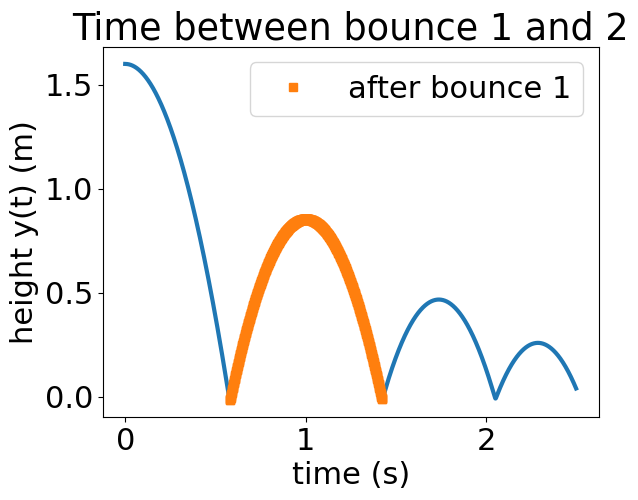

In [18]:
filename = '../data/fallingtennisball02.txt'
t, y = np.loadtxt(filename, usecols=[0,1], unpack=True)
tbounce = t[580:1425]
ybounce = y[580:1425]

print('at time t={:.2f} s, y={:.4f} m'.format(tbounce[0],ybounce[0]))
print('at time t={:.2f} s, y={:.4f} m'.format(tbounce[-1],ybounce[-1]))
plt.plot(t,y)
plt.plot(tbounce,ybounce,'s',label='after bounce 1')
plt.legend()
plt.title('Time between bounce 1 and 2')
plt.xlabel('time (s)')
plt.ylabel('height y(t) (m)');

Now, let's look at the `fall_drag` function you created that described the motion of the tennis ball. Remember, this function returns the derivative of the state. So if you input

state = $[x,~v]$

it will return

d(state)/dt = $\left[v,~-9.81+\frac{F_{D}}{m}\right]$

In [19]:
def fall_drag(state,C_d=0.47,m=0.0577,R = 0.0661/2):
    '''Computes the right-hand side of the differential equation
    for the fall of a ball, with drag, in SI units.
    
    Arguments
    ----------    
    state : array of two dependent variables [y v]^T
    m : mass in kilograms default set to 0.0577 kg
    C_d : drag coefficient for a sphere default set to 0.47 (no units)
    R : radius of ball default in meters is 0.0661/2 m (tennis ball)
    Returns
    -------
    derivs: array of two derivatives [v (-g+a_drag)]^T
    '''
    
    rho = 1.22   # air density kg/m^3
    pi = np.pi
    
    a_drag = -1/(2*m) * pi * R**2 * rho * C_d * (state[1])**2*np.sign(state[1])
    
    derivs = np.array([state[1], -9.81 + a_drag])
    return derivs

To get the position as a function of time, you can use any of the integration methods that you defined in [03_Get_Oscillations](./03_Get_Oscillations.ipynb). Here you copy in the second-order Runge-Kutta explicit method.

In [20]:
def rk2_step(state, rhs, dt):
    '''Update a state to the next time increment using modified Euler's method.
    
    Arguments
    ---------
    state : array of dependent variables
    rhs   : function that computes the RHS of the DiffEq
    dt    : float, time increment
    
    Returns
    -------
    next_state : array, updated after one time increment'''
    
    mid_state = state + rhs(state) * dt*0.5    
    next_state = state + rhs(mid_state)*dt
 
    return next_state

## Defining your problem for Python 

Now, you can finally ask your engineering question in a Python way. 

We need a function, $f(v_0)$, such that when you input the correct velocity for the initial condition, $f(v_0^{correct})=0$

So you define a new function with `def`

In [21]:
def f_v(v0,y0=ybounce[0],yT=ybounce[-1],T=(tbounce[0],tbounce[-1]),N=50):
    ''' define a function f(v) that returns 
    ymeasured(T)-ypredicted(T)
    here, the time span is based upon the tbounce variable defined above from 
    the first bounce to the second bounce
    
    arguments:
    ---------
    v0: the unknown initial vy velocity component
    y0: the known initial position
    yT: the known final position
    T: a list of two times (beginning time, end time)
    N: the number of time steps to integrate the RK2 method default = 50
    
    returns:
    --------
    error: the difference between vmeasured(T) and vpredicted(T)
        when f_v(v0)= 0, the correct initial velocity was chosen
    '''
    
    
    # initialize array
    t_sol=np.linspace(T[0],T[1],N)
    dt=t_sol[1]-t_sol[0]
    num_sol_drag = np.zeros([N,2])

    # Set intial conditions
    num_sol_drag[0,0] = y0
    num_sol_drag[0,1] = v0

    for i in range(N-1):
        num_sol_drag[i+1] = rk2_step(num_sol_drag[i], fall_drag, dt)
    error = num_sol_drag[-1,0]-yT
    #plt.plot(t_sol,num_sol_drag[:,0])
    return error

Take a look at the pieces of this function:

1. Create an array of time `t_sol`

2. Set initial conditions to `y0` and `v0` <- __here `v0` is your unknown value__

3. Use Runge-Kutta second order to integrate the function for `t_sol[0]` to `t_sol[-1]`

4. Create an output, `error` of the difference between the measured y(T), `yT`, and the current solution for y(T), `num_sol_drag[-1,0]`

When `error` is 0, you have chosen the correct initial velocity, `v0`.

To see what the output looks like, below you can take out the integration part and plot the results for a guess of `v0`.

In [22]:
# initialize array
N=50
T=(tbounce[0],tbounce[-1])
t_sol=np.linspace(T[0],T[1],N)
dt=t_sol[1]-t_sol[0]
num_sol_drag = np.zeros([N,2])
num_sol_drag[0,0] = ybounce[0]
num_sol_drag[0,1] = 3

for i in range(N-1):
    num_sol_drag[i+1] = rk2_step(num_sol_drag[i], fall_drag, dt)

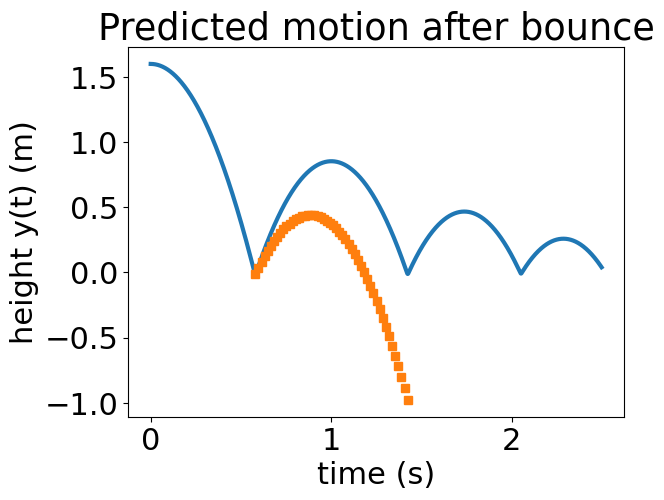

In [23]:
plt.plot(t,y)
plt.plot(t_sol,num_sol_drag[:,0],'s')
plt.title('Predicted motion after bounce')
plt.xlabel('time (s)')
plt.ylabel('height y(t) (m)');

## Exercise

Enter your best guess for `v0`. What is the error between the measured `yT` and your predicted y(T)? _Hint: use your function, `f_v`, and plot the results._

## Solving the engineering problem

Now, you have all the components you need for this "shooting" problem. You can't evaluate a derivative easily and the bisection method is too slow. Therefore, you will use the `mod_secant` function to find the correct initial velocity. 

Below is the solution. _Just one line of code!_

In [24]:
v0,out = mod_secant(f_v,0.0001,7,es=0.000001) # <-- solution line
print(v0, 'm/s is the correct initial velocity to match the height at beginning and end of bounce')
print('the solve took ',out[2],' iterations')

4.175915400675785 m/s is the correct initial velocity to match the height at beginning and end of bounce
the solve took  3  iterations


## Exercise

Change the value of the `dx` and `x0`. Does it change the final result? Does it change the time it took to arrive at the solution or the number of iterations?

In [25]:
mod_secant?

## What you've learned

* How to find the 0 of a function, aka root-finding
* The difference between a bracketing and an open methods for finding roots
* Two bracketing methods: incremental search and bisection methods
* Two open methods: Newton-Raphson and modified secant methods
* How to measure relative error
* How to compare root-finding methods
* How to frame an engineering problem as a root-finding problem
* Solve an initial value problem with missing initial conditions (the shooting method)
* _Bonus: In the Problems you'll consider stability of bracketing and open methods._

## References

1. Chapra, Steven _Applied Numerical Methods with Matlab for Engineers._ McGraw Hill. 

2. _Computational Physics with Python_, lecture notes by Eric Ayars, California State University, Chico. Available online on the author's website: https://physics.csuchico.edu/ayars/312/handouts/comp-phys-python.pdf